# 1. Load Library

In [11]:
import numpy as np
import gym
import matplotlib.pyplot as plt



# 2. Function Set

In [12]:
def discretize_state(state):
    cc = (state - env.observation_space.low)*np.array([10, 100])
    output= np.round(cc, 0).astype(int)
    return output

In [13]:
def QLearning(env, learning_rate, discount, epsilon, min_epsilon, episodes,num_state):
    #epsilon:select action
    #discount:update Q table
    #episodes:iterations
    
    # Initialize
    Q = np.random.uniform(low = -1,high = 1,size = (num_state[0], num_state[1],env.action_space.n))
    reward_episode_list = []
    ave_reward_list = []
    
    # epsilon reduction for each iteration
    reduction = (epsilon - min_epsilon)/episodes
    
    #iteration
    for i in range(episodes):
        
        reward_episode=0
        currstate= env.reset()
        currstate_dis=discretize_state(currstate)
        done = False
        
        while done != True:   
            
            if i>=(episodes - 20):
                env.render()
            if np.random.random() < 1 - epsilon: # select action,epsilon-greedy algo
                action = np.argmax(Q[currstate_dis[0], currstate_dis[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            nextstate,reward,done,other= env.step(action) #next state and reward
            nextstate_dis=discretize_state(nextstate)
            
            if done and nextstate[0] >= 0.5: #update Q table
                Q[currstate_dis[0], currstate_dis[1], action] = reward
            else:
                gd=learning_rate*(reward + discount*np.max(Q[nextstate_dis[0],nextstate_dis[1]]) - Q[currstate_dis[0], currstate_dis[1],action])
                Q[currstate_dis[0], currstate_dis[1],action] +=gd
                                     
            reward_episode+=reward
            currstate_dis = nextstate_dis
        
        # update epsilon
        if epsilon > min_epsilon:
            epsilon-=reduction
        
        reward_episode_list.append(reward_episode)
        
        #average reward
        if (i+1) % 100 == 0:
            ave_reward=np.mean(reward_episode_list)
            ave_reward_list.append(ave_reward)
            reward_episode_list = []
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
            
            
    env.close()
    
    return ave_reward_list



# 3. Run Qlearning and plot results

In [14]:
env = gym.make('MountainCar-v0')
num_state= (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
num_state= np.round(num_state, 0).astype(int) + 1
ave_reward_list= QLearning(env, 0.2, 0.9, 0.8, 0, 5000,num_state)

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

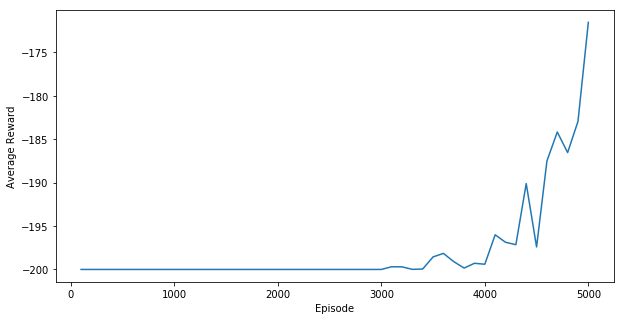

In [15]:
# Plot average reward
fig = plt.figure(figsize=(10,5))
plt.plot(100*(np.arange(len(ave_reward_list)) + 1), ave_reward_list)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.savefig('MoutainCar_Q optimization_discretize state space')  

#plt.savefig('MoutainCar_rewards.jpg')     
#plt.close()  